# Análisis de los términos de la cross-entropy

Veamos cómo es el término de la cross entropy correspondiente a una observación con $d_i=1$ en función de $h$.

In [1]:
#load_ext autoreload
#autoreload 2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
h=np.linspace(-2,5,num=500)

In [3]:
xent=np.log2(1+np.exp(-h))

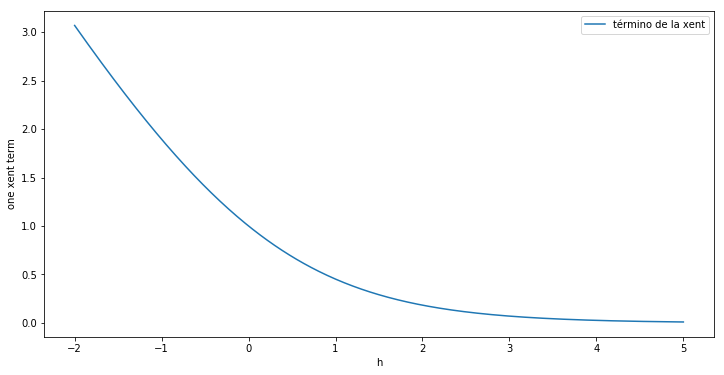

In [4]:
plt.figure(figsize=(12,6))
plt.plot(h,xent,label="término de la xent")
plt.xlabel("h")
plt.ylabel("one xent term")
plt.legend()
plt.savefig("xent_term.png")
plt.show()


## Regresión Logística vs SVM

Comparemos cómo funciona la regresión logística y SVM para este dataset sintético.

In [5]:
X_1=np.random.uniform(2,3,10000).reshape([-1,1])
y_1=np.ones(X_1.shape)
X_0=np.random.uniform(-2,-3,100).reshape([-1,1])
y_0=np.zeros(X_0.shape)
X=np.vstack([X_1,X_0])
y=np.vstack([y_1,y_0])

In [6]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=1e6)
clf.fit(X,y)

/home/cselmo/.conda/envs/doctorado-gpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/cselmo/.conda/envs/doctorado-gpu/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
X_proba=np.linspace(-5,5).reshape([-1,1])
y_proba=clf.predict_proba(X_proba)[:,1]
y_predict=clf.predict(X_proba)

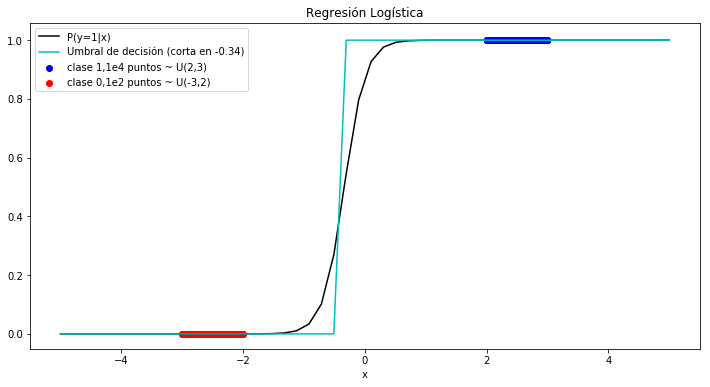

In [8]:
plt.figure(figsize=(12,6))
plt.scatter(X_1,y_1,c='b',label="clase 1,1e4 puntos ~ U(2,3)")
plt.scatter(X_0,y_0,c='r', label="clase 0,1e2 puntos ~ U(-3,2)")
plt.plot(X_proba,y_proba,c='k', label="P(y=1|x)")
plt.plot(X_proba,y_predict,c='c',label="Umbral de decisión (corta en -0.34)")
plt.title("Regresión Logística")
plt.xlabel("x")
plt.legend()
plt.savefig("unbalancedRL.png")
plt.show()

In [9]:
clf.predict_proba([[-0.34]])

array([[0.50306437, 0.49693563]])

## Ahora con SVM

Parámetros de SVC y recomendaciones prácticas

* C: $1/\lambda$, parámetro de regularización. Regula el margen de separación entre clases.  
* kernel: Poner "linear" se explicará mas adelante.  
* degree, coef0: Parámetros de los kernels. Se explicará mas adelante también.  
* shrinking: Es una mejora vinculada al uso de los multiplicadores de Lagrange del optimizador. Para mas detalle ver sección 5.1 de la documentación de libsvm. Poner siempre en True.  
* probability: Opción para que el clasificador calcule una pseudo-probabilidad. Enlentece mucho el entrenamiento.  
* decision_function_shape : Como SVM es un clasificador binario, determinar la técnica que se utilizará para clasificación multiclase. OVR y OVO son las opciones.

Propiedades interesantes:

* support_: índices del set de entrenamiento de los vectores que quedaron como vectores de soporte.  
* support_vectors: vectores de soporte  
* dual_coef_: Coeficientes de la solución del problema dual. A partir de estos coeficientes, y los vectores de soporte, se obtienen los pesos w. En el caso de kernel='linear', esta relación es lineal.  


In [10]:
from sklearn.svm import SVC
clf=SVC(C=1,kernel='linear')
clf.fit(X,y)

/home/cselmo/.conda/envs/doctorado-gpu/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [11]:
X_proba=np.linspace(-5,5).reshape([-1,1])
y_proba=clf.predict(X_proba)

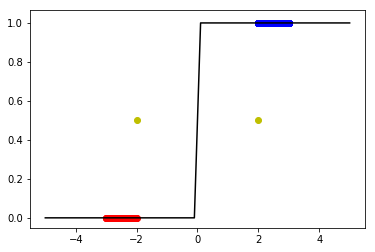

In [12]:
plt.scatter(X_1,y_1,c='b')
plt.scatter(X_0,y_0,c='r')
plt.scatter(clf.support_vectors_,0.5*np.ones(clf.support_vectors_.shape),c="y",label="support vectors")
plt.plot(X_proba,y_proba,c='k')
plt.show()

In [13]:
clf.support_

array([10091,  3455], dtype=int32)

En el código anterior probar con los valores de C: 1e-1, 1e-2, 1e-3

# Caso 2D

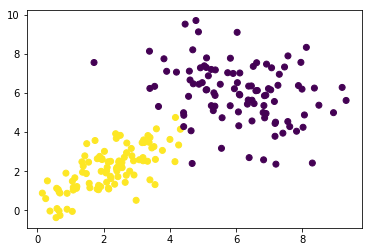

In [51]:
from SVM_helper import plot_boundaries
N1=100
N2=100
X=np.vstack([np.random.multivariate_normal([2,2],[[1,0.7],[0.7,1]],N1),np.random.multivariate_normal([6,6],[[2,-0.7],[-0.7,2]],N2)])
y=np.hstack([np.ones(N1),-1*np.ones(N2)])
X_test=np.vstack([np.random.multivariate_normal([2,2],[[1,0.7],[0.7,1]],N1),np.random.multivariate_normal([6,6],[[2,-0.7],[-0.7,2]],N2)])
y_test=np.hstack([np.ones(N1),-1*np.ones(N2)])
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [75]:
C=1e3
clf=SVC(C=C, kernel="linear",probability=True,tol=1e-3,max_iter=1000,verbose=1)
clf.fit(X,y)

[LibSVM]

/home/cselmo/.conda/envs/doctorado-gpu/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=1000, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=1)

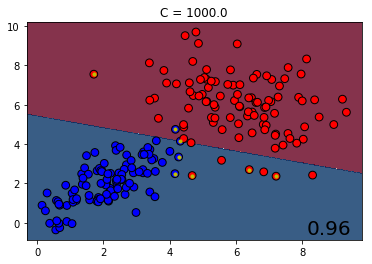

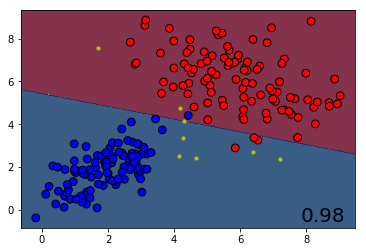

In [76]:
plot_boundaries(X,y,score=clf.score(X,y), probability_func=clf.predict,support_vectors=clf.support_vectors_)
plt.title("C = {}".format(C))
plt.savefig("SVM_2D_SM_C{}.png".format(C))
plt.show()
plot_boundaries(X_test,y_test,score=clf.score(X_test,y_test), probability_func=clf.predict,support_vectors=clf.support_vectors_)
plt.show()

Para el clasificador anterior probar con C=1e3,1e2,1e1,1,1e-1, 1e-2 y 1e-3 y analizar el overfitting.